In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv("Zomatodata.csv")
print(df.head())   #displaying first five rows of the dataset

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


**Displaying the top 5 Rows.**

In [4]:
K=df.rename(columns={'approx_cost(for two people)':'approx_cost(2 people)'})
Datafrm=K.rename(columns={'listed_in(type)':'Type'})      #Renaming columns
Datafrm

,name,online_order,book_table,rate,votes,approx_cost(2 people),Type
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**Renaming the columns.**

In [13]:
#Removing the denominator
def HandleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
Datafrm['rate']=Datafrm['rate'].apply(HandleRate)
Datafrm

,name,online_order,book_table,rate,votes,approx_cost(2 people),Type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


**Here we are converting the rate column into float type by removing the Denominator.**

In [18]:
Datafrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   148 non-null    object 
 1   online_order           148 non-null    object 
 2   book_table             148 non-null    object 
 3   rate                   148 non-null    float64
 4   votes                  148 non-null    int64  
 5   approx_cost(2 people)  148 non-null    int64  
 6   Type                   148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Therefore, there are No Null values in this Data set and also, the rate column is converted into the float-data type**

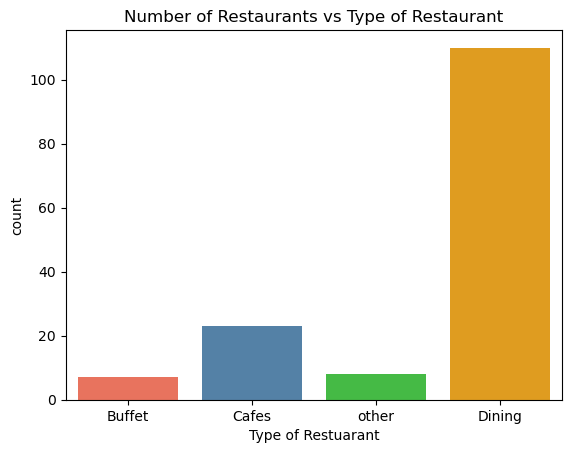

In [197]:
sns.countplot(x=Datafrm['Type'],hue=Datafrm['Type'],palette=['#FF6347', '#4682B4', '#32CD32', 'orange'])
plt.xlabel("Type of Restuarant")
plt.title("Number of Restaurants vs Type of Restaurant")
plt.show()

**Conclusion:** *From this above Barchart,we can understand that many of the restuarants are fall into* **Dining Category.**

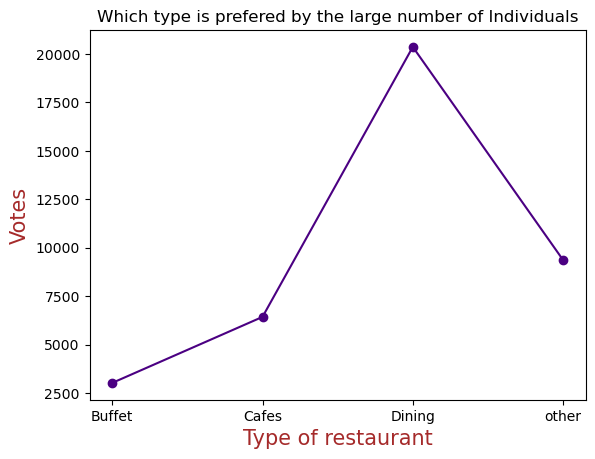

In [193]:
import pandas as pd
grouped_data = Datafrm.groupby('Type')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="indigo", marker="o")
plt.xlabel("Type of restaurant", c="brown", size=15)
plt.ylabel("Votes", c="brown", size=15)
plt.title("Which type is prefered by the large number of Individuals")
plt.show()

**Conclusion:** *This line plot shows that, A large number of individuals are prefered the* **Dining Restaurants.** 

In [62]:
maximum_votes = Datafrm['votes'].max()
restaurant_wid_max_votes = Datafrm.loc[Datafrm['votes'] == maximum_votes, 'name']
 
print("Restaurant with the maximum votes:")
print(restaurant_wid_max_votes)

Restaurant with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


**The Restuarant which got the maximum number of votes is** ***"EMPIRE RESTAURANT."*** 

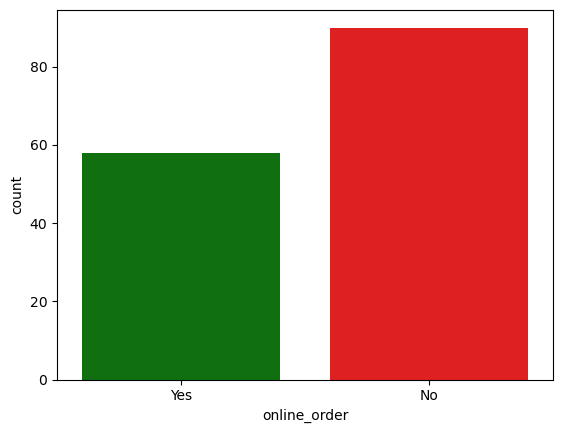

In [78]:
sns.countplot(x=Datafrm['online_order'],hue=Datafrm['online_order'],palette=['green','red'])
plt.show()

**Conclusion:** From the above plot, we can understand that many of the restaurants are **not accepting the Online orders.**

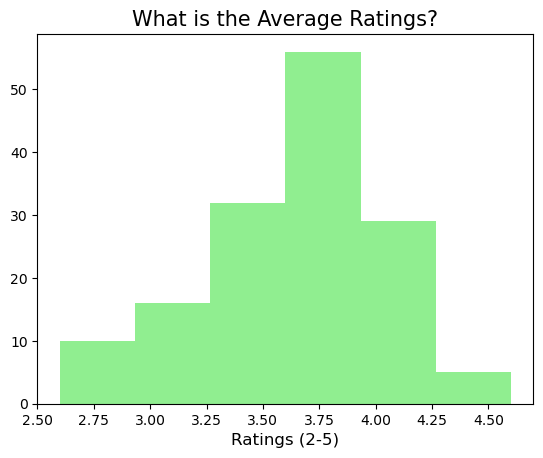

In [195]:
plt.hist(Datafrm['rate'],bins=6,color='lightgreen')
plt.title("What is the Average Ratings?", size=15)
plt.xlabel("Ratings (2-5)",size=12)
plt.show()

**Conclusion:** *From this Histogram, the Average Ratings received by the majority of restaurants is* **3.5 to 5.**

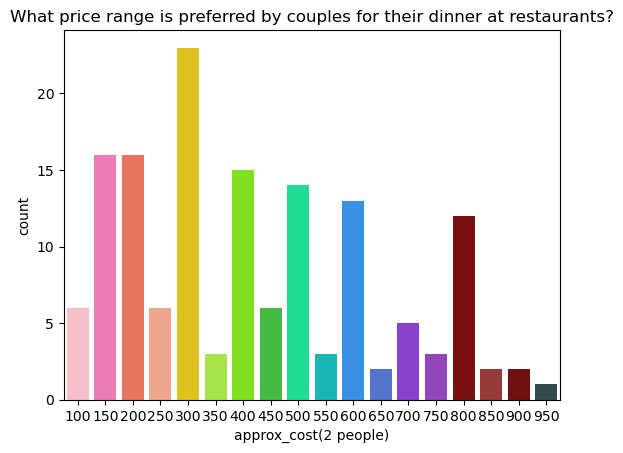

In [121]:
couple_data=Datafrm['approx_cost(2 people)']
sns.countplot(x=couple_data, hue=couple_data,palette=['#FFB6C1', '#FF69B4', '#FF6347', '#FFA07A', '#FFD700', '#ADFF2F', '#7FFF00', '#32CD32', '#00FA9A', '#00CED1', '#1E90FF', '#4169E1', '#8A2BE2', '#9932CC', '#8B0000', '#A52A2A', '#800000', '#2F4F4F'])
plt.legend().remove()
plt.title("What price range is preferred by couples for their dinner at restaurants?")
plt.show()

**Conclusion:** *The above plot shows that, the majority of the couples preferred the restaurants with the approximate cost of* **300 Rupees.**

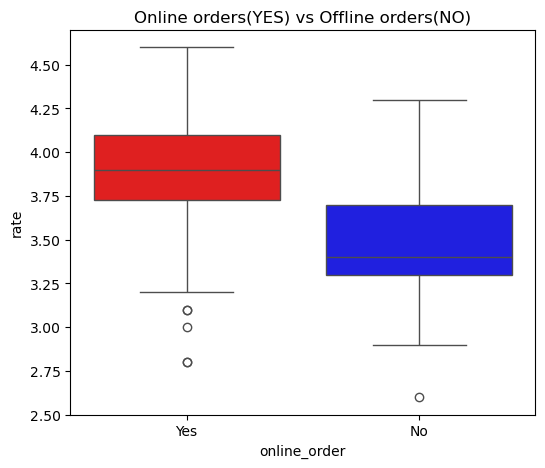

In [145]:
plt.figure(figsize = (6,5))
sns.boxplot(x = 'online_order', y = 'rate',hue='online_order', data = Datafrm,palette=['red','blue'])
plt.title("Online orders(YES) vs Offline orders(NO)")
plt.show()

**Conclusion:** *The above Box plot shows that, **online orders** received the* **excellent ranting** *when compared to the offline orders which obtained lower ratings.*

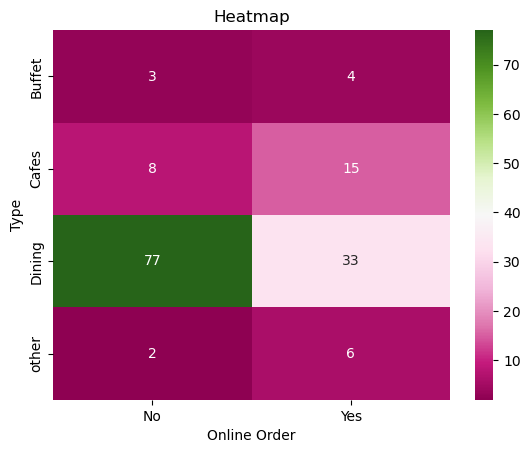

In [175]:
pivot_table = Datafrm.pivot_table(index='Type', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="PiYG", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type")
plt.show()

**Conclusion:** ***Dining restaurants primarily accept offline orders, providing a more traditional and personal dining experience. In contrast, cafes predominantly receive online orders, catering to the convenience and speed preferred by their clientele. This trend suggests that clients enjoy the in-person interaction and ambiance at restaurants, while they favor the ease and efficiency of online ordering when visiting cafes.***